In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Passenger id index: <br>
## train set: [1, 891],  test set: [892, 1301]

In [2]:
trainDF = pd.read_csv('train.csv')
testDF = pd.read_csv('test.csv')

Y = trainDF['Survived']
#trainDF.drop(['Survived'], axis = 1, inplace = True)

DF = pd.concat([trainDF.drop(['Survived'], axis = 1), testDF], axis = 0)

In [3]:
DF.set_index(DF['PassengerId']-1, inplace = True)

In [4]:
DF

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Separating titles from names

In [5]:
names = []
for x in DF['Name']:
    names.append(x.split('. ', maxsplit = 1))

names = pd.DataFrame(names, columns = ['Surname/Title', 'First/Middle'])

titles = []
for x in names['Surname/Title']:
    titles.append(x.split(', ', maxsplit = 1))

titles = pd.DataFrame(titles, columns = ['Surname', 'Title'])

In [6]:
DF = pd.concat([DF, titles['Title']], axis = 1)

In [7]:
DF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [8]:
for x in np.unique(DF['Title']):
    print(x, ': ', len(DF[DF['Title']==x]))

Capt :  1
Col :  4
Don :  1
Dona :  1
Dr :  8
Jonkheer :  1
Lady :  1
Major :  2
Master :  61
Miss :  260
Mlle :  2
Mme :  1
Mr :  757
Mrs :  197
Ms :  2
Rev :  8
Sir :  1
the Countess :  1


In [9]:
# DF['Title']= DF['Title'].astype('category')
# DF['Title'] = DF['Title'].cat.codes
# DF['Sex']= DF['Sex'].astype('category')
# DF['Sex'] = DF['Sex'].cat.codes

## Data Analysis

General survival rate in training set:  0.3838383838383838


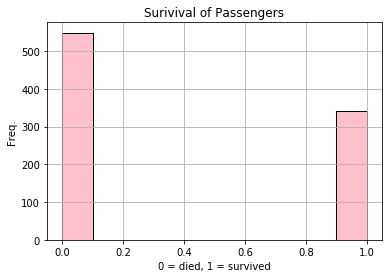

In [10]:
plt.hist(trainDF['Survived'], edgecolor = 'k', color = 'pink')
plt.xlabel('0 = died, 1 = survived')
plt.ylabel('Freq.')
plt.title('Surivival of Passengers')
plt.grid()

print('General survival rate in training set: ', ((len(trainDF[trainDF['Survived']==1]))/(len(trainDF))))

Survival rate of first class passengers wrt passengers of the same class:  0.6296296296296297
Rate of first class passengers in the survivors:  0.39766081871345027


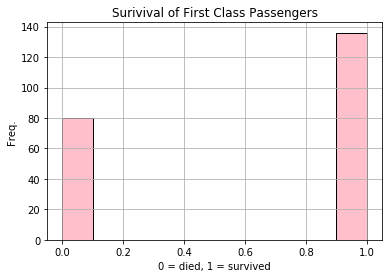

In [11]:
tempDF = trainDF[trainDF['Pclass']==1]
plt.hist(tempDF['Survived'], edgecolor = 'k', color = 'pink')
plt.xlabel('0 = died, 1 = survived')
plt.ylabel('Freq.')
plt.title('Surivival of First Class Passengers')
plt.grid()


print('Survival rate of first class passengers wrt passengers of the same class: ', (len(tempDF[tempDF['Survived']==1])/len(tempDF)))
print('Rate of first class passengers in the survivors: ', (len(tempDF[tempDF['Survived']==1])/len(trainDF[trainDF['Survived']==1])))

Survival rate of second class passengers wrt passengers of the same class:  0.47282608695652173
Rate of second class passengers in the survivors:  0.2543859649122807


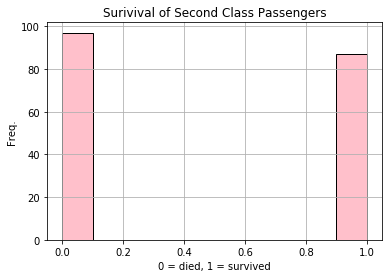

In [12]:
tempDF = trainDF[trainDF['Pclass']==2]
plt.hist(tempDF['Survived'], edgecolor = 'k', color = 'pink')
plt.xlabel('0 = died, 1 = survived')
plt.ylabel('Freq.')
plt.title('Surivival of Second Class Passengers')
plt.grid()


print('Survival rate of second class passengers wrt passengers of the same class: ', (len(tempDF[tempDF['Survived']==1])/len(tempDF)))
print('Rate of second class passengers in the survivors: ', (len(tempDF[tempDF['Survived']==1])/len(trainDF[trainDF['Survived']==1])))

Survival rate of third class passengers wrt passengers of the same class:  0.24236252545824846
Rate of third class passengers in the survivors:  0.347953216374269


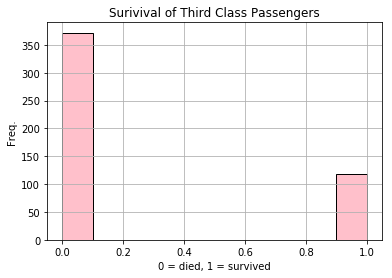

In [13]:
tempDF = trainDF[trainDF['Pclass']==3]
plt.hist(tempDF['Survived'], edgecolor = 'k', color = 'pink')
plt.xlabel('0 = died, 1 = survived')
plt.ylabel('Freq.')
plt.title('Surivival of Third Class Passengers')
plt.grid()


print('Survival rate of third class passengers wrt passengers of the same class: ', (len(tempDF[tempDF['Survived']==1])/len(tempDF)))
print('Rate of third class passengers in the survivors: ', (len(tempDF[tempDF['Survived']==1])/len(trainDF[trainDF['Survived']==1])))

In [14]:
#plt.boxplot(DF['Fare'])

## Data Cleaning

In [15]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import mean_squared_error

In [16]:
agetrainerDF = DF[DF['Age'].notnull()][['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']]

In [17]:
agetrainerDF

,Pclass,Age,SibSp,Parch,Fare,Title
0,3,22.0,1,0,7.2500,Mr
1,1,38.0,1,0,71.2833,Mrs
2,3,26.0,0,0,7.9250,Miss
3,1,35.0,1,0,53.1000,Mrs
4,3,35.0,0,0,8.0500,Mr
6,1,54.0,0,0,51.8625,Mr
7,3,2.0,3,1,21.0750,Master
8,3,27.0,0,2,11.1333,Mrs
9,2,14.0,1,0,30.0708,Mrs
10,3,4.0,1,1,16.7000,Miss


In [18]:
agetrainerDF = pd.get_dummies(agetrainerDF, columns = ['Title'])

In [19]:
agetrainerDF[agetrainerDF['Fare'].isnull()]

,Pclass,Age,SibSp,Parch,Fare,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
1043,3,60.5,0,0,NaN,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
#agetrainerDF.drop(index = 1043, inplace = True)
agetrainerDF['Fare'].fillna(value = np.mean(agetrainerDF[agetrainerDF['Pclass']==3]['Fare']), inplace = True)

In [21]:
agetrainerDF[:10]

,Pclass,Age,SibSp,Parch,Fare,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,3,22.0,1,0,7.2500,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,54.0,0,0,51.8625,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,3,2.0,3,1,21.0750,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,3,27.0,0,2,11.1333,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,2,14.0,1,0,30.0708,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,3,4.0,1,1,16.7000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Fitting a random forest regressor to output age for NaN cleaning

In [22]:
import sys
sys.path.append('C:\\Users\\zerof\\Documents\\Python Scripts')

In [23]:
sys.path

['C:\\Users\\zerof\\Documents\\Data_Science\\titanic',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\python37.zip',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\DLLs',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\lib',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3',
 '',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\zerof\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\zerof\\.ipython',
 'C:\\Users\\zerof\\Documents\\Python Scripts']

In [24]:
from data_sci import m_fillna

In [25]:
DF[DF['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
29,30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr
42,43,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Mr


In [26]:
for x in np.unique(DF['Title']):
    m_fillna(DF[DF['Title']==x], column = "Age", method = 'median')

C:\Users\zerof\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
DF[DF['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
29,30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr
42,43,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Mr


In [28]:
masters = DF[DF['Title']=='Master']

In [29]:
masters[masters['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
65,66,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master
159,160,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master
176,177,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Master
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Master
1135,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,Master
1230,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,Master
1235,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,Master
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [30]:
m_fillna(masters, column = 'Age', method = 'median')

In [31]:
masters

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master
16,17,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master
50,51,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,Master
59,60,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,Master
63,64,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,Master
65,66,3,"Moubarek, Master. Gerios",male,4.00,1,1,2661,15.2458,NaN,C,Master
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master
125,126,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,Master
159,160,3,"Sage, Master. Thomas Henry",male,4.00,8,2,CA. 2343,69.5500,NaN,S,Master
164,165,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,Master


In [32]:
# RFR = rfr_predictor(agetrainerDF.drop(['Age'], axis = 1), agetrainerDF['Age'])

In [33]:
# nruns=100
# errors=[]
# for i in range(nruns):
#     xtrain,xtest,ytrain,ytest=train_test_split(agetrainerDF.drop(['Age'], axis = 1), agetrainerDF['Age'], test_size=0.20)
#     RFR=RandomForestRegressor(n_estimators = 100)
#     RFR.fit(xtrain,ytrain)
#     YP=RFR.predict(xtest)
#     errors.append(mean_squared_error(np.log(YP),np.log(ytest)))
# print('log mse: ', np.mean(errors),'std: ', np.std(errors))

In [34]:
# nafillerDF = DF[DF['Age'].isnull()][['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']]
# nafillerDF = pd.get_dummies(nafillerDF, columns = ['Title'])
# nafillerDF